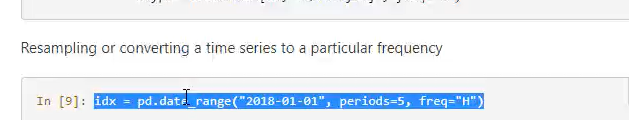
https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-period-dtype

In [1]:
import pandas as pd
import numpy as np

In [2]:
idx = pd.date_range("2018-01-01", periods=72, freq="H")
# M=Month, D=Day, H=Hour W=Weekly, B=Business Day,       timeseries-offset-aliases

In [3]:
idx

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               '2018-01-01 10:00:00', '2018-01-01 11:00:00',
               '2018-01-01 12:00:00', '2018-01-01 13:00:00',
               '2018-01-01 14:00:00', '2018-01-01 15:00:00',
               '2018-01-01 16:00:00', '2018-01-01 17:00:00',
               '2018-01-01 18:00:00', '2018-01-01 19:00:00',
               '2018-01-01 20:00:00', '2018-01-01 21:00:00',
               '2018-01-01 22:00:00', '2018-01-01 23:00:00',
               '2018-01-02 00:00:00', '2018-01-02 01:00:00',
               '2018-01-02 02:00:00', '2018-01-02 03:00:00',
               '2018-01-02 04:00:00', '2018-01-02 05:00:00',
               '2018-01-02 06:00:00', '2018-01-02 07:00:00',
               '2018-01-

In [4]:
rng = np.random.default_rng()

# RNG for the data frame

In [5]:
# ts  = pd.DataFrame(data=d, index=idx)
ts  = pd.DataFrame(data=rng.random(len(idx)), index=idx)

In [6]:
ts

,0
2018-01-01 00:00:00,0.161382
2018-01-01 01:00:00,0.159052
2018-01-01 02:00:00,0.040064
2018-01-01 03:00:00,0.483559
2018-01-01 04:00:00,0.778037
...,...
2018-01-03 19:00:00,0.773489
2018-01-03 20:00:00,0.847004
2018-01-03 21:00:00,0.597316
2018-01-03 22:00:00,0.696745


In [7]:
ts  = pd.DataFrame(data=rng.random(len(idx)), index=idx , columns=["Adm"])

In [8]:
ts

,Adm
2018-01-01 00:00:00,0.109082
2018-01-01 01:00:00,0.452266
2018-01-01 02:00:00,0.639703
2018-01-01 03:00:00,0.582890
2018-01-01 04:00:00,0.381537
...,...
2018-01-03 19:00:00,0.095120
2018-01-03 20:00:00,0.908821
2018-01-03 21:00:00,0.918317
2018-01-03 22:00:00,0.051683


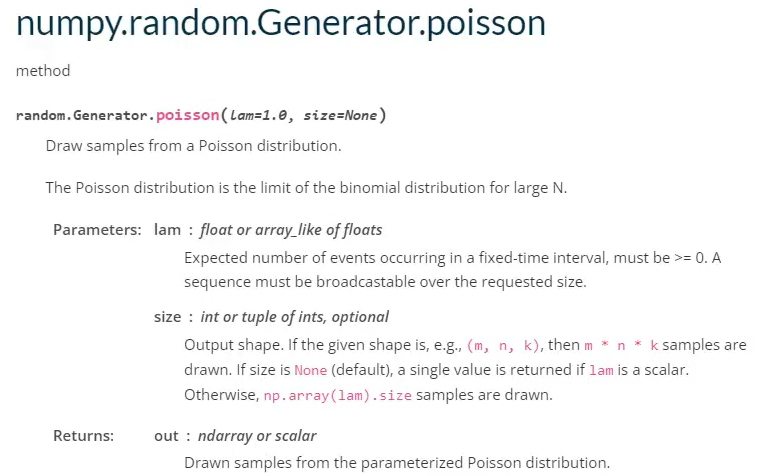
Poisson Related to time

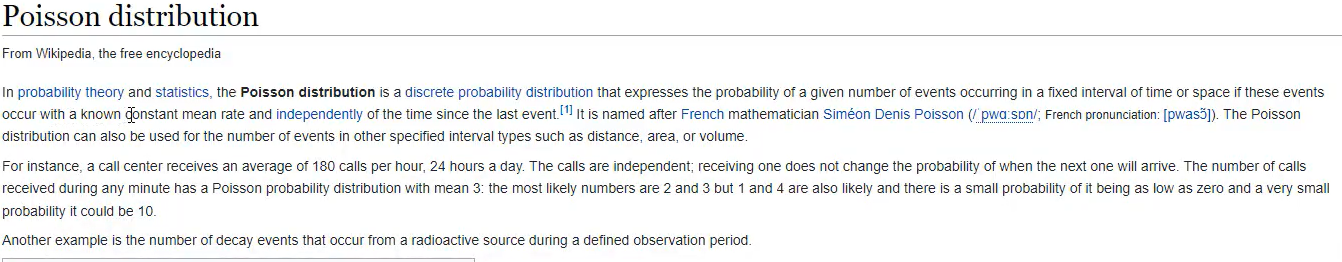

In [9]:
# eg to show where 5 is avg number of events per hour
rng.poisson(5, 10)

array([9, 3, 4, 3, 2, 4, 3, 4, 7, 4], dtype=int64)

In [10]:
ts  = pd.DataFrame(data=rng.poisson(5, len(idx)), index=idx , columns=["Adm"])

In [11]:
ts

,Adm
2018-01-01 00:00:00,3
2018-01-01 01:00:00,5
2018-01-01 02:00:00,9
2018-01-01 03:00:00,1
2018-01-01 04:00:00,4
...,...
2018-01-03 19:00:00,4
2018-01-03 20:00:00,7
2018-01-03 21:00:00,3
2018-01-03 22:00:00,3


In [12]:
# nb adm number does  not specify whether those admissions were hour before or hour after

# Accessing and Grouping - Aggregate

In [14]:
ts  = pd.DataFrame(data=rng.poisson(10, len(idx)), index=idx , columns=["Adm"]) # 10 avg

In [15]:
ts.mean()

Adm    10.319444
dtype: float64

In [17]:
ts.loc['2018-01-01 03:00:00']

Adm    9
Name: 2018-01-01 03:00:00, dtype: int64

# Range of Data

In [18]:
ts.loc['2018-01-01 00:00:00':'2018-01-01 23:00:00']

,Adm
2018-01-01 00:00:00,12
2018-01-01 01:00:00,8
2018-01-01 02:00:00,4
2018-01-01 03:00:00,9
2018-01-01 04:00:00,12
2018-01-01 05:00:00,7
2018-01-01 06:00:00,15
2018-01-01 07:00:00,18
2018-01-01 08:00:00,11
2018-01-01 09:00:00,6


In [ ]:
# loc inclusive of points

In [19]:
ts.loc['2018-01-01 00:00:00':'2018-01-01 23:00:00'].mean()     

Adm    10.25
dtype: float64

In [20]:
ts.loc['2018-01-02 00:00:00':'2018-01-02 23:00:00'].mean()

Adm    10.125
dtype: float64

In [21]:
# iloc not inclusive of end point

In [22]:
ts.iloc[:6]   # only output 0-5

,Adm
2018-01-01 00:00:00,12
2018-01-01 01:00:00,8
2018-01-01 02:00:00,4
2018-01-01 03:00:00,9
2018-01-01 04:00:00,12
2018-01-01 05:00:00,7


In [25]:
ts.iloc[:23] # not inclusive of 23, only 0-22

,Adm
2018-01-01 00:00:00,12
2018-01-01 01:00:00,8
2018-01-01 02:00:00,4
2018-01-01 03:00:00,9
2018-01-01 04:00:00,12
2018-01-01 05:00:00,7
2018-01-01 06:00:00,15
2018-01-01 07:00:00,18
2018-01-01 08:00:00,11
2018-01-01 09:00:00,6


# Resample/Condense

In [29]:
ts.resample("D").mean()    # runs avg per day in df

,Adm
2018-01-01,10.250000
2018-01-02,10.125000
2018-01-03,10.583333
